In [1]:
# Decision tree learning

from IPython.display import Image
%matplotlib inline

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    color=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        
        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')
        else:
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')        

In [2]:
# Load the MedTrial dataset

import numpy as np
import pandas as pd

df = pd.read_csv("MedTrial.csv")
df

,Age,Sex,BP,Cholesterol,Na_to_K,Med
0,23,F,HIGH,HIGH,25.355,Yipic
1,47,M,LOW,HIGH,13.093,Comodify
2,47,M,LOW,HIGH,10.114,Comodify
3,28,F,NORMAL,HIGH,7.798,Xlenify
4,61,F,LOW,HIGH,18.043,Yipic
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,Comodify
196,16,M,LOW,HIGH,12.006,Comodify
197,52,M,NORMAL,HIGH,9.894,Xlenify
198,23,M,NORMAL,NORMAL,14.020,Xlenify


In [3]:
# # scatter plot
# setosa_plx = iris.iloc[0:50, 2].values
# setosa_pwy = iris.iloc[0:50, 3].values
# versicolor_plx = iris.iloc[50:100, 2].values
# versicolor_pwy = iris.iloc[50:100, 3].values
# virginica_plx = iris.iloc[100:150, 2].values
# virginica_pwy = iris.iloc[100:150, 3].values


# fig, ax = plt.subplots()
# fig.set_size_inches(8, 6)

# ax.scatter(setosa_plx, setosa_pwy, label="Setosa", marker="s", facecolor="red")
# ax.scatter(versicolor_plx, versicolor_pwy, label="Versicolor", marker="x", 
#            facecolor="blue")
# ax.scatter(virginica_plx, virginica_pwy, label="Virginica", marker="o", 
#            facecolor="green") 

# ax.set_xlabel("Petal Length (cm)")
# ax.set_ylabel("Petal Width (cm)")
# ax.set_title("Iris Petal Sizes")
# ax.legend()
# plt.savefig('images/03_scatter.png', dpi=300)

In [4]:
# 1. Arrange the data into featues and target arrays.

# change categorical values of variety to numeric values

from sklearn.preprocessing import LabelEncoder 
labelencoder = LabelEncoder() #initializing an object of class LabelEncoder
df['Med'] = labelencoder.fit_transform(df['Med']) #fitting and transforming the desired categorical column.
df['Sex'] = labelencoder.fit_transform(df['Sex'])
df['BP'] = labelencoder.fit_transform(df['BP'])
df['Cholesterol'] = labelencoder.fit_transform(df['Cholesterol'])

# extract BP and Na_to_K ratio
X = df.iloc[:, [2, 4]].values
y = df.iloc[:, 5]

# print(X)
# print(y)

# change y from categorical to numeric
# y = pd.factorize(df[5])[0]
# print(y)

In [5]:
# 2. Split data into a training set and test set
#    Splitting data into 70% training and 30% test data:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

print('Labels count in y:', np.bincount(y))
print('Labels count in y_train:', np.bincount(y_train))
print('Labels count in y_test:', np.bincount(y_test))

Labels count in y: [23 16 16 54 91]
Labels count in y_train: [16 11 11 38 64]
Labels count in y_test: [ 7  5  5 16 27]


In [6]:
# 3. Select the ML algorithm, and its parameteters

from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=4, 
                                    random_state=1)

/tmp/ipykernel_478/2611758185.py:33: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
/tmp/ipykernel_478/2611758185.py:47: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):


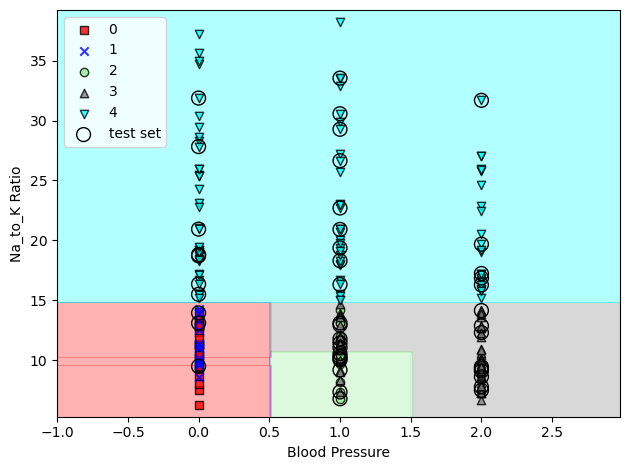

In [7]:
# 4. Build the model (.fit)

tree_model.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=tree_model,
                      test_idx=range(105, 150))

plt.xlabel('Blood Pressure')
plt.ylabel('Na_to_K Ratio')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_20.png', dpi=300)
plt.show()

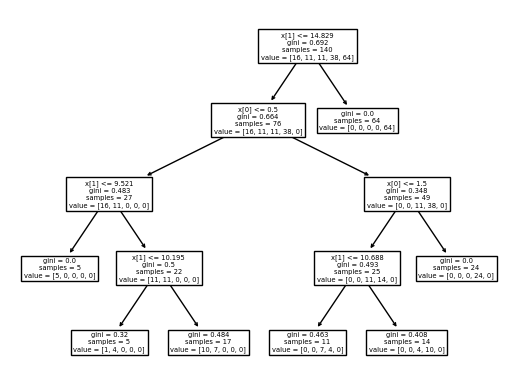

In [8]:
from sklearn import tree

tree.plot_tree(tree_model)
#plt.savefig('images/03_21_1.pdf')
plt.show()

Note: you may need to restart the kernel to use updated packages.


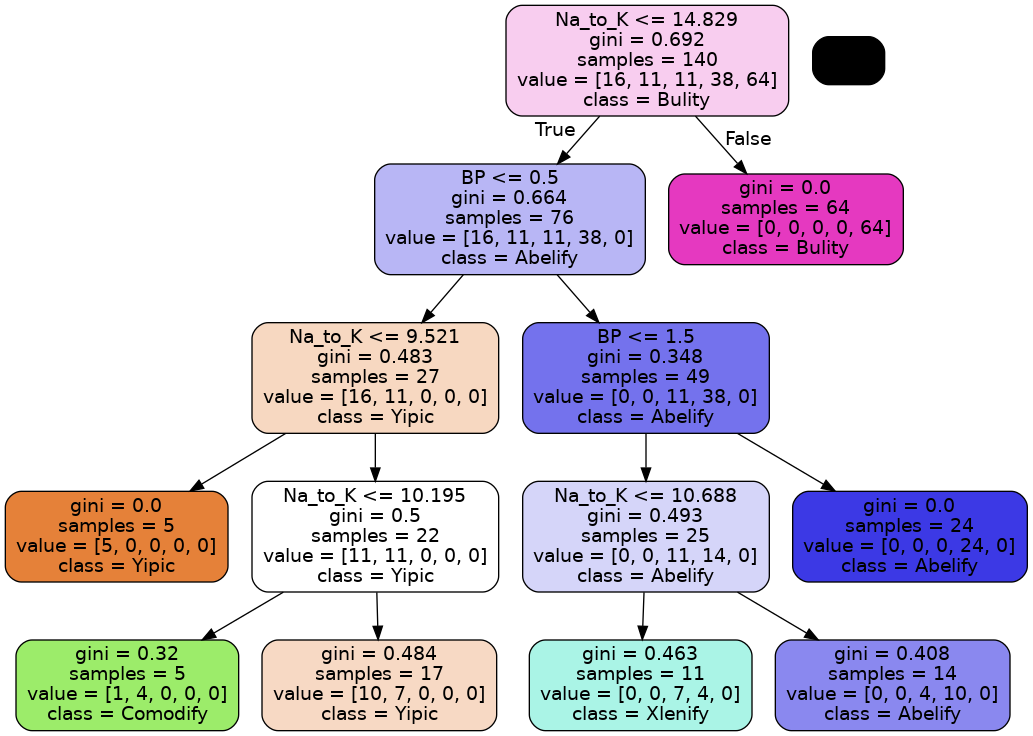

In [9]:
# make it nice
%pip install pydotplus
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree_model,
                           filled=True, 
                           rounded=True,
                           class_names=['Yipic', 
                                        'Comodify',
                                        'Xlenify', 'Abelify', 'Bulity'],
                           feature_names=['BP', 
                                          'Na_to_K'],
                           out_file=None) 
graph = graph_from_dot_data(dot_data) 
graph.write_png('tree.png') 

Image(filename='tree.png', width=600)

In [10]:
# 5. Apply the model to the test data (.predict)

from sklearn import metrics 
y_pred = tree_model.predict(X_test)

In [11]:
# 6. Estimate performance (accuracy score)

print(metrics.accuracy_score(y_test, y_pred))

0.8666666666666667


How many dimensions does plot_decision_regions function works for? 
The plot_decision_regions function works for 1 or 2 dimensions.

What is the maximum accuracy you can achieve with the least amount of features? 
With just two features, blood pressure and Na_to_K ration, I achieved an accuracy of approximatley 87%.

How does the depth of the tree affect accuracy?
As the depth of the tree increases, the accuracy increases.